In [1]:
# Import relevant Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the dataset from a CSV
df = pd.read_csv("data/web3_token_transfers.csv")

In [3]:
df.head()

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60


In [4]:
df.shape

(1000, 7)

In [5]:
df.dtypes

sender_wallet       object
receiver_wallet     object
token               object
amount             float64
timestamp           object
gas_used             int64
tx_fee_usd         float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sender_wallet    1000 non-null   object 
 1   receiver_wallet  1000 non-null   object 
 2   token            1000 non-null   object 
 3   amount           1000 non-null   float64
 4   timestamp        1000 non-null   object 
 5   gas_used         1000 non-null   int64  
 6   tx_fee_usd       1000 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.8+ KB


In [7]:
df.describe()

,amount,gas_used,tx_fee_usd
count,1000.00000,1000.000000,1000.000000
mean,486.25301,61034.444000,5.249380
std,486.25492,22479.552115,2.746538
min,2.32000,21163.000000,0.500000
25%,134.58000,43613.500000,2.970000
50%,343.39000,60090.500000,5.235000
75%,681.91250,80600.000000,7.660000
max,4086.22000,99945.000000,9.980000


In [8]:
# Parse the timestamp column as datetime using pd.to_datetime.
df['timestamp'] = pd.to_datetime(df['timestamp'])
print(df['timestamp'].head())

0   2024-07-27 03:58:20
1   2024-07-14 03:04:09
2   2024-07-29 07:29:38
3   2024-07-20 06:26:24
4   2024-07-13 23:07:51
Name: timestamp, dtype: datetime64[ns]


In [9]:
# Show the top 5
df.head()

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60


In [10]:
# Show the bottom 5 rows.
df.tail()

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd
995,0x7d321f54337d3b2fe762d2f98cc65a08b33c8167,0x12b225c93d09fbfee50834d34bb976ba2ab744a4,USDC,48.03,2024-07-19 20:23:42,30503,1.63
996,0x99ffd9b436b447f0b75704c666c2e3387468aabc,0xad14eea793cb71aeec4914db1cd51b955768446a,USDC,1246.35,2024-07-06 01:06:21,81703,3.24
997,0xf2476d3a88703c2484581466c841db8ce62c411d,0x8233219c96b703195211f975be60343e130b66a5,WBTC,73.57,2024-07-29 12:05:32,85379,4.28
998,0xb7e4e6b50e93960442a38761471840f4a48cb869,0x199d63a67615ec83d45f91010f6c8206f711b2be,WBTC,1500.25,2024-07-27 03:40:11,78866,9.24
999,0xb21913e7f083654695aeeab90f1510468f1dc41e,0x9bca5940e7d53f22ca22245954f66ece9ab16af8,USDC,295.30,2024-07-21 23:44:32,37905,9.94


In [11]:
# Count the number of unique wallets (senders and receivers)
unique_senders = df['sender_wallet'].nunique()
unique_receivers = df['receiver_wallet'].nunique()
total_unique_wallets = pd.concat([df['sender_wallet'], df['receiver_wallet']]).nunique()

print(f"Unique senders: {unique_senders}")
print(f"Unique receivers: {unique_receivers}")
print(f"Total unique wallets (senders + receivers): {total_unique_wallets}")

# Count how many transactions each token has
token_transaction_counts = df['token'].value_counts()

print("\nNumber of transactions per token:")
print(token_transaction_counts)

Unique senders: 1000
Unique receivers: 1000
Total unique wallets (senders + receivers): 2000

Number of transactions per token:
token
WBTC    214
ETH     203
USDC    200
UNI     194
DAI     189
Name: count, dtype: int64


In [12]:
# Total amount sent by each wallet
sent = df.groupby('sender_wallet')['amount'].sum()
print(sent)

sender_wallet
0x0003c3872d1848ec2011e26ad7571c69370f9fd0     634.78
0x0034126c0d51266516fd65d12f3c9a67f04062fa     138.44
0x005f673297464a3a9b8657e7f9d1a19e6d62f0f7      26.53
0x00906f78509cf901863c7f6980e32877871b784e     452.03
0x00fafa59c53d3dd96f5ce0c922ea899710e33c56     136.02
                                               ...   
0xff9b9663adb0864f9be675097e1d9d12a685c9af     179.32
0xffab6a48a594ca3dea01cbcb44673475c863b7d1     380.27
0xffd0af93e3570caac85652b2842369c8c22befcd      23.26
0xffd362f45a8736314fa0278a959bf14c4f4ffdfe    1298.94
0xfff2203dcedf4f760a54ad07236a3498cbeab07b    1624.55
Name: amount, Length: 1000, dtype: float64


In [13]:
# Total amount received by each wallet
received = df.groupby('receiver_wallet')['amount'].sum()
print(received)

receiver_wallet
0x010ca7452031dca3995f59dcfa5a80446f2e4c03     191.37
0x0114a8e880508bfe99f6c996096380067a1c6b7a    2884.04
0x0147c9752252629711318f835142d3153726dbea     501.85
0x01a4c2ac00ef039936197a9bfa3d1bb99a75d923      60.27
0x01a5453728aaf20873b9ac9b236cdb28f08cb285      47.86
                                               ...   
0xff54d95ac2898ea829739527ac616afe509b21fc     137.31
0xff80cbb0b2e5a08050469495f0b9f7871e6befd1     119.74
0xff8439a0dd7607d6dbb0aa73fdac628dda059114      36.92
0xffaae95b2a8933e5f6d8ba337098e69e1a3b64f8     524.86
0xffb6056e48b4eec9ef93d6fb825d7736a5e1919c     656.28
Name: amount, Length: 1000, dtype: float64


In [14]:
# Combine into one DataFrame
wallets = pd.DataFrame({'sent': sent, 'received': received}).fillna(0)
wallets

,sent,received
0x0003c3872d1848ec2011e26ad7571c69370f9fd0,634.78,0.00
0x0034126c0d51266516fd65d12f3c9a67f04062fa,138.44,0.00
0x005f673297464a3a9b8657e7f9d1a19e6d62f0f7,26.53,0.00
0x00906f78509cf901863c7f6980e32877871b784e,452.03,0.00
0x00fafa59c53d3dd96f5ce0c922ea899710e33c56,136.02,0.00
...,...,...
0xffab6a48a594ca3dea01cbcb44673475c863b7d1,380.27,0.00
0xffb6056e48b4eec9ef93d6fb825d7736a5e1919c,0.00,656.28
0xffd0af93e3570caac85652b2842369c8c22befcd,23.26,0.00
0xffd362f45a8736314fa0278a959bf14c4f4ffdfe,1298.94,0.00


In [15]:
# Create net_flow column
wallets['net_flow'] = wallets['received'] - wallets['sent']

# Top 5 wallets by total amount sent
top_senders = wallets.sort_values(by='sent', ascending=False).head(5)

print("Top 5 wallets by amount sent:")
top_senders


Top 5 wallets by amount sent:


,sent,received,net_flow
0xd538f9c05ec121d00f70a00aa58b4ea2b7339a54,4086.22,0.0,-4086.22
0x0a83fcafb15e96514ef61020d4c96714a42bd923,2884.04,0.0,-2884.04
0xcc3f561f13db4c0a50c9f71ef693cf59eef2ba25,2847.44,0.0,-2847.44
0x1172060a8e20eb50ab9194d2780e99a42c9ac008,2478.41,0.0,-2478.41
0x64182502c1b1b4d6584998fc33358956434d2dc4,2328.50,0.0,-2328.50


In [16]:
# Average, median, std of amount per token
token_stats = df.groupby('token')['amount'].agg(['mean', 'median', 'std'])
print("Token stats:")
token_stats

Token stats:


,mean,median,std
token,,,
DAI,454.243386,316.210,456.309472
ETH,505.486502,365.730,524.465758
UNI,478.323196,305.365,497.945907
USDC,518.157150,367.185,507.707334
WBTC,473.650093,349.240,443.158188


In [17]:
# Token with the highest transaction volume (by total amount)
token_volume = df.groupby('token')['amount'].sum()
top_token = token_volume.idxmax()
print(f"\nToken with highest total volume: {top_token} ({token_volume[top_token]})")



Token with highest total volume: USDC (103631.43)


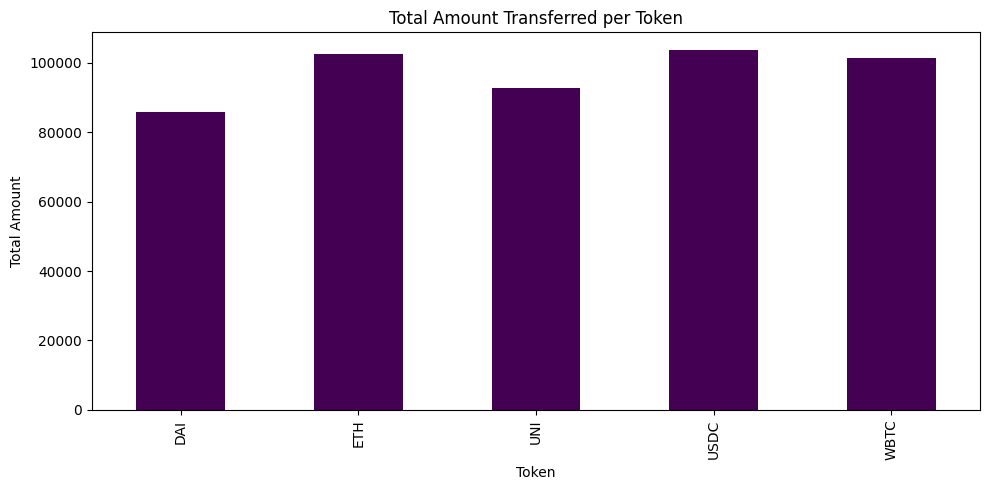

In [18]:
# Bar chart: total amount transferred per token

token_volume.plot(
    kind='bar', 
    figsize=(10, 5), 
    title='Total Amount Transferred per Token',
    colormap='viridis'
)

plt.ylabel('Total Amount')
plt.xlabel('Token')
plt.tight_layout()
plt.show()

In [19]:
# Convert timestamp to date
df['date'] = df['timestamp'].dt.date

# Group by date
daily_stats = df.groupby('date').agg(
    transactions=('amount', 'count'),
    total_volume=('amount', 'sum'),
    avg_tx_size=('amount', 'mean')
)

daily_stats


,transactions,total_volume,avg_tx_size
date,,,
2024-07-01,28,11886.22,424.507857
2024-07-02,33,16560.16,501.823030
2024-07-03,23,8569.60,372.591304
2024-07-04,32,18195.10,568.596875
2024-07-05,34,13713.53,403.339118
2024-07-06,38,16442.27,432.691316
2024-07-07,38,17249.47,453.933421
2024-07-08,45,20232.45,449.610000
2024-07-09,40,15507.76,387.694000


In [20]:
# Total gas used per token
total_gas_per_token = df.groupby('token')['gas_used'].sum().reset_index()
print("Total Gas Used per Token:")
total_gas_per_token

Total Gas Used per Token:


,token,gas_used
0,DAI,11918034
1,ETH,12163737
2,UNI,12054799
3,USDC,11967216
4,WBTC,12930658


In [21]:
# Average transaction fee in USD using NumPy
avg_tx_fee_usd = np.mean(df['tx_fee_usd'])
print(f"Average Transaction Fee (USD): ${avg_tx_fee_usd:.4f}")

Average Transaction Fee (USD): $5.2494


In [22]:
# Top 3 most expensive transactions (based on tx_fee_usd)
top_3_expensive_tx = df.sort_values(by='tx_fee_usd', ascending=False).head(3)
print("\nTop 3 Most Expensive Transactions:")
print(top_3_expensive_tx)


Top 3 Most Expensive Transactions:
                                  sender_wallet  \
692  0xde9626a617067e8c9d9f5e53cf631139b4696d56   
117  0xb40ff3ae9391ca7df67ba9877a5b1ad2d2e15c5a   
75   0x44cb7ef9bc0528b331a9c8cbdd555eeda37cf0e4   

                                receiver_wallet token  amount  \
692  0x2d9e724bee9d687f456fcdd2a76132a7d58ada94   ETH  354.24   
117  0xa10e3155d329183ef464cbc77795c9f3d48d26db   DAI  103.25   
75   0x53777175d6fb4679ca72b7d2486e5cefce3cdc56   UNI  652.83   

              timestamp  gas_used  tx_fee_usd        date  
692 2024-07-21 08:41:07     25358        9.98  2024-07-21  
117 2024-07-27 19:37:55     61042        9.98  2024-07-27  
75  2024-07-26 14:37:35     94972        9.97  2024-07-26  


In [23]:
# Convert timestamp to datetime
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Extract day from timestamp
df['day'] = df['timestamp'].dt.date

# Pivot table: Rows = Token, Columns = Day, Values = Total amount transferred
pivot_table = df.pivot_table(
    index='token',
    columns='day',
    values='amount',
    aggfunc='sum',
    fill_value=0
)
print("Pivot Table - Total Amount Transferred per Token per Day:")
pivot_table


Pivot Table - Total Amount Transferred per Token per Day:


day,2024-07-01,2024-07-02,2024-07-03,2024-07-04,2024-07-05,2024-07-06,2024-07-07,2024-07-08,2024-07-09,2024-07-10,...,2024-07-21,2024-07-22,2024-07-23,2024-07-24,2024-07-25,2024-07-26,2024-07-27,2024-07-28,2024-07-29,2024-07-30
token,,,,,,,,,,,,,,,,,,,,,
DAI,981.03,3293.77,1098.44,1429.71,2150.39,4961.15,1459.46,2778.56,5690.08,2873.41,...,4683.88,5082.96,1274.72,5799.61,2187.39,2362.51,3811.85,5424.34,2521.41,3661.26
ETH,4437.94,3387.59,2179.93,2631.23,2163.15,1396.71,5213.51,7382.79,1054.12,4103.09,...,1324.07,2011.65,1013.46,4403.55,3904.14,1632.84,2521.84,4941.49,1868.99,3092.18
UNI,1365.56,3226.33,1139.66,4812.17,3343.93,2662.74,2526.87,4525.55,2530.37,240.37,...,1186.67,4703.19,2651.29,3757.96,4080.85,4372.96,4908.37,4156.40,2501.23,4340.96
USDC,3315.54,4156.94,2153.10,5980.24,4019.92,3759.70,4501.74,1489.73,2647.31,3573.40,...,5045.03,3625.93,5466.10,3349.96,2314.46,1959.97,4458.44,3199.36,978.38,2464.37
WBTC,1786.15,2495.53,1998.47,3341.75,2036.14,3661.97,3547.89,4055.82,3585.88,935.94,...,7192.64,6496.35,6356.13,4042.02,4023.45,712.79,3548.41,5095.99,6346.91,5295.82


In [24]:
# Categorise transactions using apply(): low, medium, high
def tag_tx(amount):
    if amount < 100:
        return 'low'
    elif amount <= 1000:
        return 'medium'
    else:
        return 'high'

df['tx_size'] = df['amount'].apply(tag_tx)
print("\nSample Transaction Tags:")
print(df[['amount', 'tx_size']].head())


Sample Transaction Tags:
    amount tx_size
0   234.63  medium
1  1505.06    high
2   658.37  medium
3   456.47  medium
4    84.81     low


In [25]:
# Create binary feature with np.where(): is_large_tx
df['is_large_tx'] = np.where(df['amount'] > 1000, 1, 0)
print("\nSample Flag for Large Transactions:")
print(df[['amount', 'is_large_tx']].head())

# Summary by token
print("\nToken Summary (Large Transactions):")
token_summary = df.groupby('token').agg({
    'amount': ['count', 'sum', 'mean'],
    'is_large_tx': 'sum'
}).round(2)

token_summary.columns = ['tx_count', 'total_amount', 'avg_amount', 'large_tx_count']
token_summary


Sample Flag for Large Transactions:
    amount  is_large_tx
0   234.63            0
1  1505.06            1
2   658.37            0
3   456.47            0
4    84.81            0

Token Summary (Large Transactions):


,tx_count,total_amount,avg_amount,large_tx_count
token,,,,
DAI,189,85852.00,454.24,23
ETH,203,102613.76,505.49,30
UNI,194,92794.70,478.32,27
USDC,200,103631.43,518.16,33
WBTC,214,101361.12,473.65,29


In [26]:
# Create mock token prices
unique_tokens = df['token'].unique()
np.random.seed(42)

df_prices = pd.DataFrame({
    'token': unique_tokens,
    'token_price': np.random.uniform(0.5, 500, size=len(unique_tokens))
})

print("Mock Token Prices:")
print(df_prices)



Mock Token Prices:
  token  token_price
0   UNI   187.582789
1  USDC   475.381796
2  WBTC   366.130974
3   ETH   299.529913
4   DAI    78.431311


In [27]:
# Merge datasets and calculate USD amounts
df_merged = pd.merge(df, df_prices, on='token', how='left')
df_merged['amount_usd'] = df_merged['amount'] * df_merged['token_price']

# Top tokens by USD volume
top_tokens_usd = df_merged.groupby('token')['amount_usd'].sum().sort_values(ascending=False)

print("\nTop Tokens by USD Volume:")
for i, (token, volume) in enumerate(top_tokens_usd.head().items(), 1):
    print(f"{i}. {token}: ${volume:,.2f}")


Top Tokens by USD Volume:
1. USDC: $49,264,495.32
2. WBTC: $37,111,445.58
3. ETH: $30,735,890.59
4. UNI: $17,406,688.66
5. DAI: $6,733,484.90


In [28]:
df.head()

,sender_wallet,receiver_wallet,token,amount,timestamp,gas_used,tx_fee_usd,date,day,tx_size,is_large_tx
0,0xaed548b0ad2ad42d36a65fc9fbb7365290273735,0x6f0fa65da6805b547779f78d7ad8e2a1247cd860,UNI,234.63,2024-07-27 03:58:20,78134,3.71,2024-07-27,2024-07-27,medium,0
1,0xadebdbe4ffde843c5c0942476dafed98f4081ed2,0xfab70b3d71fab174410d390a80a1377c72a41251,USDC,1505.06,2024-07-14 03:04:09,41491,9.32,2024-07-14,2024-07-14,high,1
2,0xe380d92bab460b09297a542e4b0198e2c87e43c6,0x322edf020491e29d79318e73fb976d1c4bf159e2,WBTC,658.37,2024-07-29 07:29:38,22341,2.63,2024-07-29,2024-07-29,medium,0
3,0x262afa887ea89b1b66c12e70d25de9412bdf3ddb,0x8ce7e3767410f34c6db80d9bd87bb5503ae1a0e3,UNI,456.47,2024-07-20 06:26:24,65623,4.04,2024-07-20,2024-07-20,medium,0
4,0x4d87bd4dc83166db001549b0f7dd10ed8172a979,0xaf6bb63813b74b9c62a370447287eb805b11c3ca,WBTC,84.81,2024-07-13 23:07:51,21338,4.60,2024-07-13,2024-07-13,low,0
